#### Interpolation using Lagrange Polynomials

* Lagrange basis and test plot, out of 10: 10
* Lagrange polynomial and test plot, out of 10: 10
* Reproduce Iske figure 2.2(b) out of 5: 5
* Reproduce Iske figure 2.3 out of 5: 5

Total, out of 30: 30

## Feb 21 Homework
### By Daniel Safavisohi

In [3]:
import numpy as np
import matplotlib.pyplot as plt

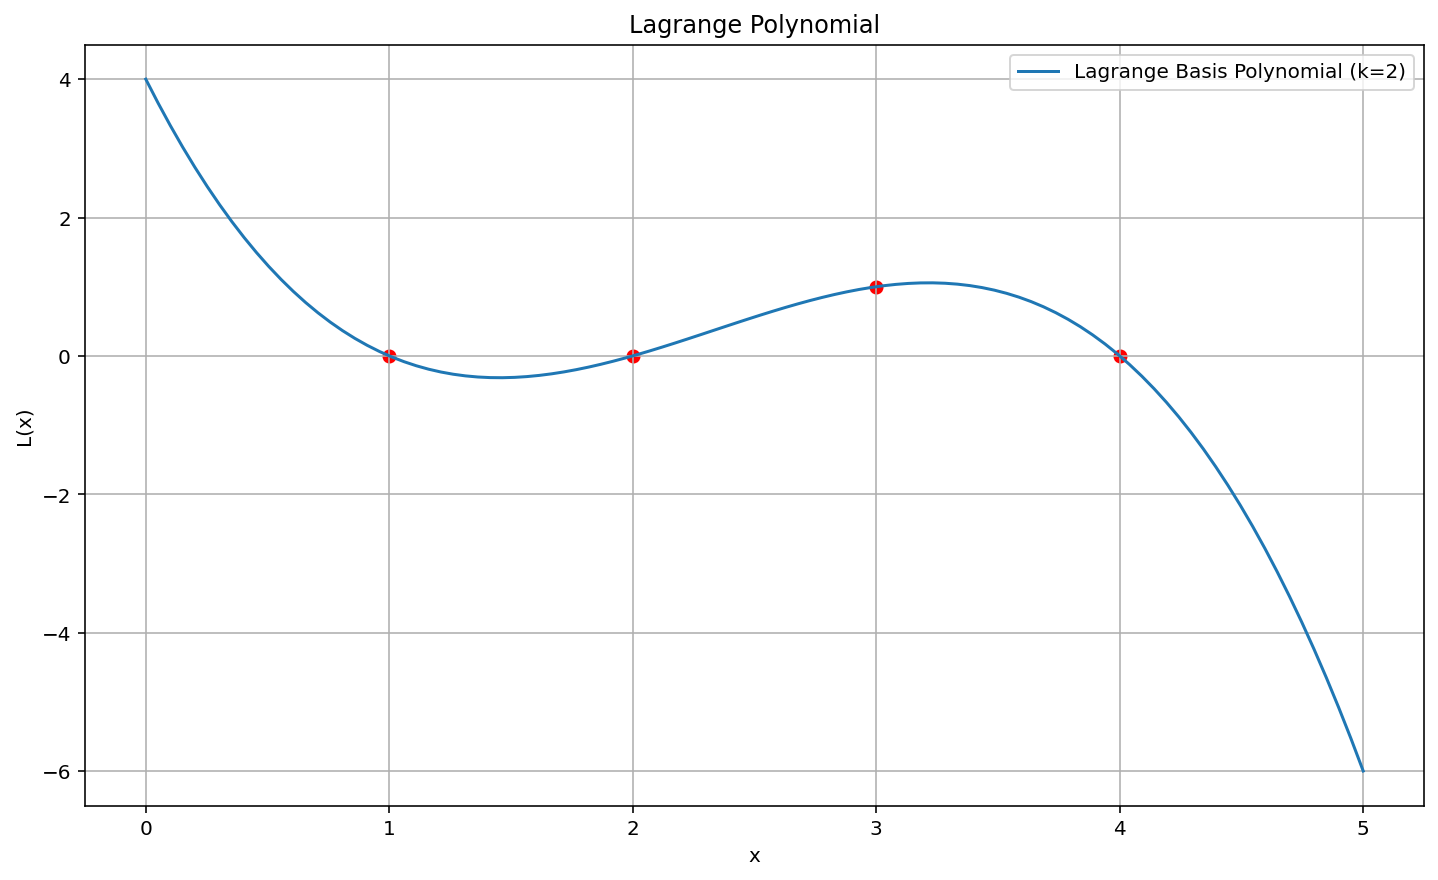

In [4]:
def lagrange_basis(xcoords: list, k: int, x: list) -> float:
    """
    Calculate the value at x of the Lagrange interpolating (basis) polynomial 
    parameters:
    - xcoords: coordinates of the point we have for our interpolation function
    - k : determine number of terms of lagrange polynomial we want to consider. It should be integer otherwise the result would 
    be zero.
    - x : other points that function should pass them in order to make a graph
    """
    L = 1
    for i, xi in enumerate(xcoords):
        if i != k:
            L *= (x - xi) / (xcoords[k] - xi)
    return L

# Plotting it for xcoords=[1,2,3,4] and k=2
xcoords_test = [1, 2, 3, 4]
k_test = 2
x_values = np.linspace(0, 5, 100)  # Generate 100 points between 0 and 5
y_values = [lagrange_basis(xcoords_test, k_test, x) for x in x_values]

plt.figure()
plt.plot(x_values, y_values, label="Lagrange Basis Polynomial (k=2)")
plt.scatter(xcoords_test, [lagrange_basis(xcoords_test, k_test, xi) for xi in xcoords_test], color='red')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.title('Lagrange Polynomial')
plt.legend()
plt.grid(True)
plt.show()


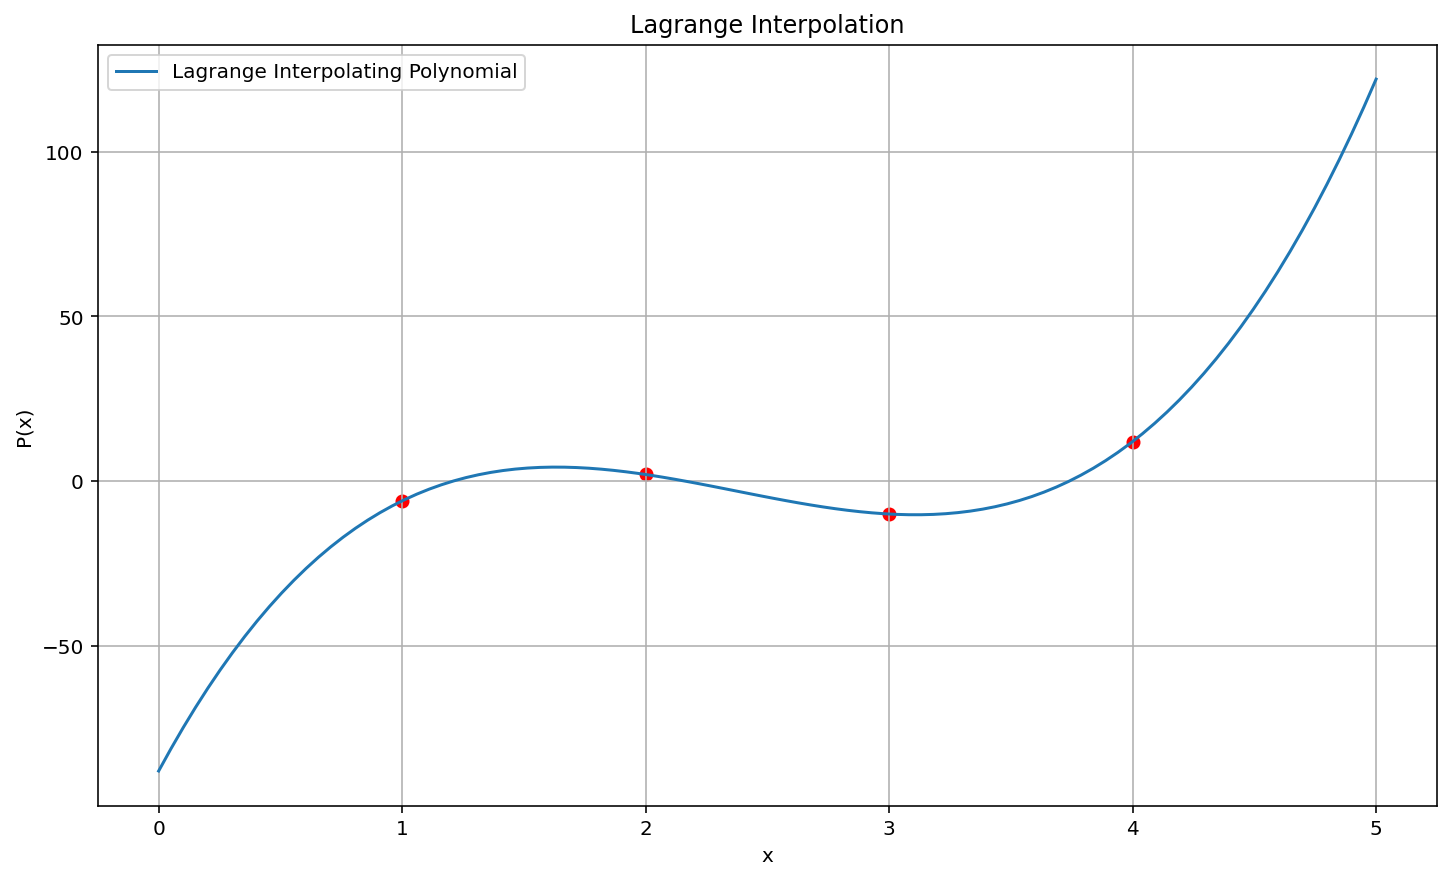

In [5]:
def lagrange_interpolation(xcoords: list, ycoords: list, x):
    """
    Calculate the value at x of the interpolating polynomial that passes through
    all (xcoords, ycoords) points.
    parameters:
    - xcoords:
    - ycoords
    - x:
    """
    n = len(xcoords)
    if n != len(ycoords):
        raise ValueError("xcoords and ycoords must be of the same length")

    interpolated_value = 0
    for k in range(n):
        L_k = lagrange_basis(xcoords, k, x)
        interpolated_value += ycoords[k] * L_k

    return interpolated_value

# Testing the function by plotting it for xcoords=[1,2,3,4] and ycoords=[-6,2,-10,12]
xcoords_test2 = [1, 2, 3, 4]
ycoords_test2 = [-6, 2, -10, 12]

y_values_interpolated = [lagrange_interpolation(xcoords_test2, ycoords_test2, x) for x in x_values]

plt.figure()
plt.plot(x_values, y_values_interpolated, label="Lagrange Interpolating Polynomial")
plt.scatter(xcoords_test2, ycoords_test2, color='red')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

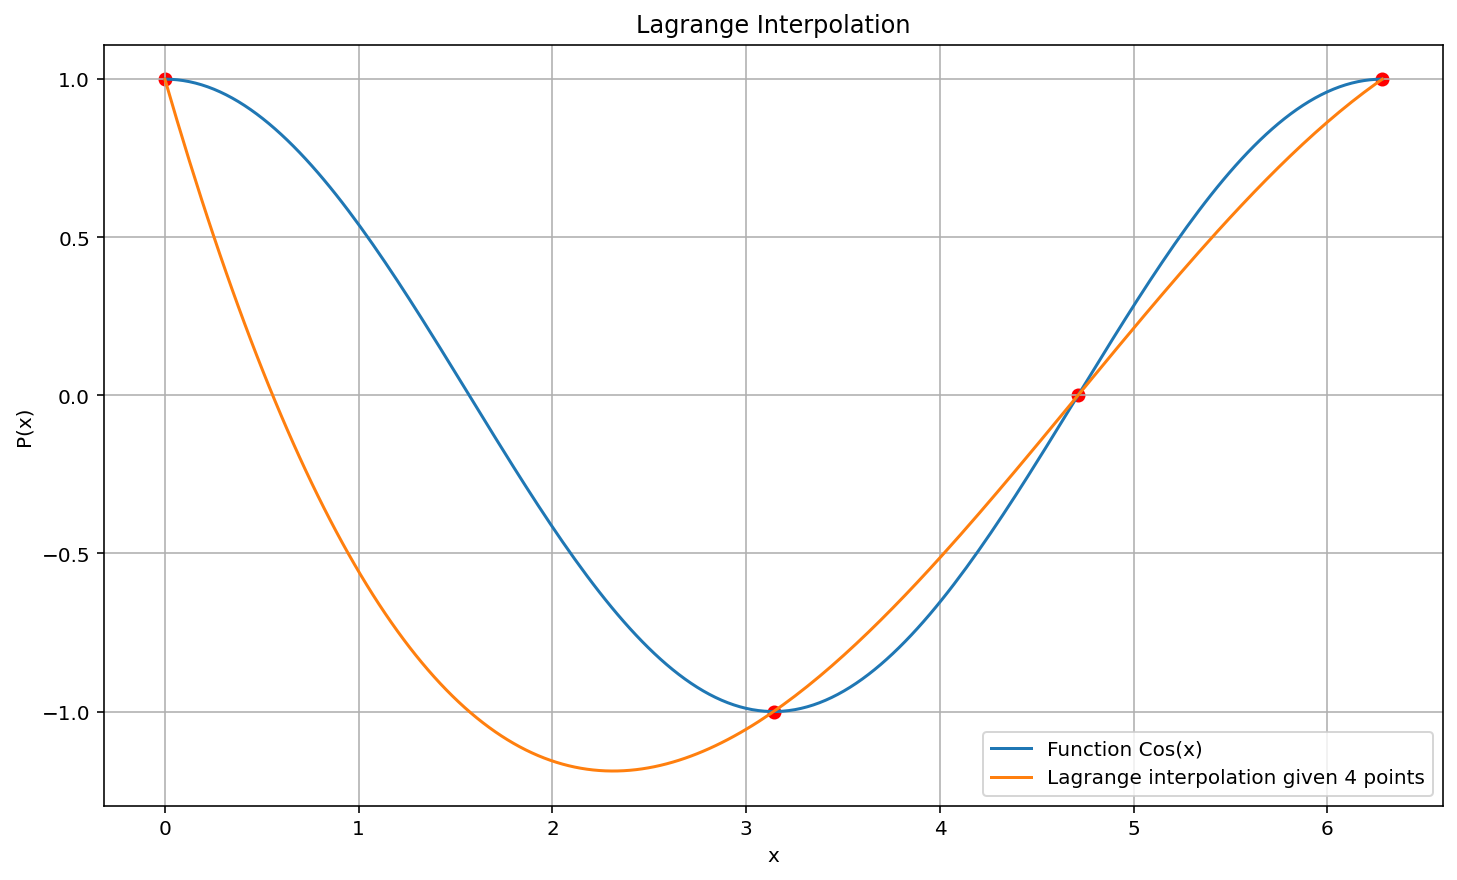

In [12]:
# Result of figure 2.2b

x_c = [0, np.pi, 3*np.pi/2, 2*np.pi]
y_c = [1, -1, 0, 1]

x = np.linspace(0, 2*np.pi, 200)
y = np.cos(x)

y_interpolated = [lagrange_interpolation(x_c, y_c, i) for i in x]

plt.figure()
plt.plot(x, y, label="Function Cos(x)")
plt.scatter(x_c, y_c, color='red')
plt.plot(x, y_interpolated, label="Lagrange interpolation given 4 points")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

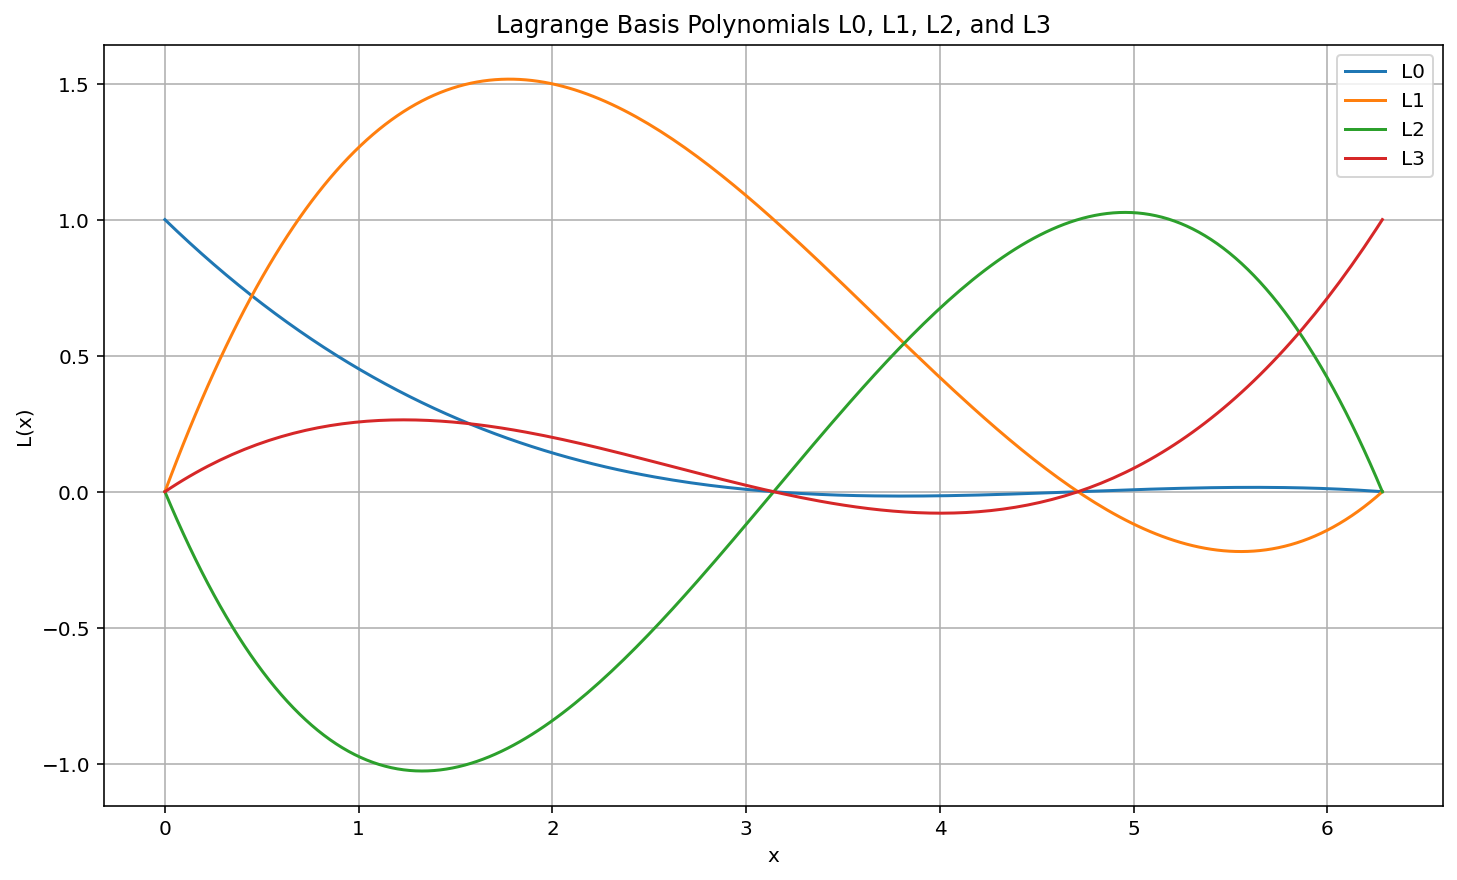

In [13]:
# Recreating plot 2.3

plt.figure()

# Plotting each Lagrange basis polynomial
for k in range(4):
    y_values = [lagrange_basis(x_c, k, i) for i in x]
    plt.plot(x, y_values, label=f"L{k}")
    #plt.scatter(x_c[k],1, color='red') 

plt.xlabel('x')
plt.ylabel('L(x)')
plt.title('Lagrange Basis Polynomials L0, L1, L2, and L3')
plt.legend()
plt.grid(True)
plt.show()